<a href="https://colab.research.google.com/github/tajbirahmed143/Math-DataScience/blob/main/MNIST_Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading MNIST and show montage

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
from skimage.io import imread

In [2]:
# Define function to move data to GPU with gradient tracking
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

# Define function to move data to GPU without gradient tracking
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [3]:
# Function to plot images
def plot(x):
    if type(x) == torch.Tensor:
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [4]:
# Function to create a montage of images
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))


100%|██████████| 9912422/9912422 [00:00<00:00, 72983378.23it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94859587.96it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32170827.15it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 16422869.63it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



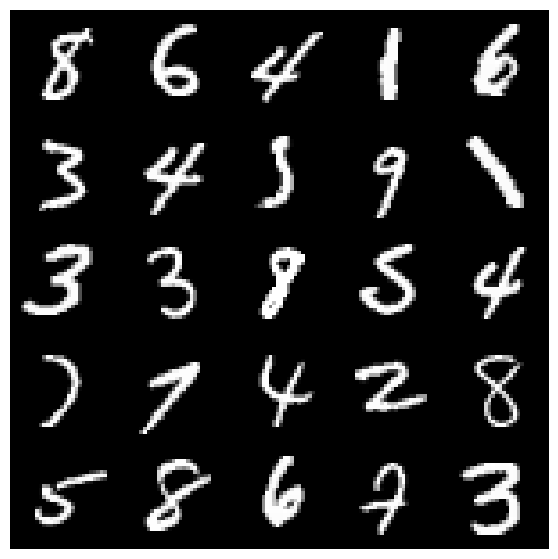

In [5]:
# Load MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:, None, :, :] / 255
X_test = X_test[:, None, :, :] / 255

# Show a montage of MNIST images
montage_plot(X[125:150, 0, :, :])


##Run random y=mx model on MNIST

In [6]:
## Run random y=mx model on MNIST
X = X.reshape(X.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Move data to GPU
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

X = X.T

x = X[:, 0:1]
x.shape

torch.Size([784, 1])

In [7]:

# Initialize random weights
M = GPU(np.random.rand(10, 784))
y = M @ x
batch_size = 64

x = X[:, 0:batch_size]

M = GPU(np.random.rand(10, 784))

y = M @ x


##Train random walk model to at least 75%

In [ ]:
# Calculate predictions and accuracy
y = torch.argmax(y, 0)
accuracy = torch.sum((y == Y[0:batch_size])) / batch_size

m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10, 784))

    m = m_best + step * m_random

    y = m @ X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum() / len(Y)

    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc


0.09740000218153
0.09786666929721832
0.11656666547060013
0.12130000442266464
0.14211666584014893
0.15985000133514404
0.16281667351722717
0.17061667144298553
0.17454999685287476
0.1752166748046875
0.17746667563915253
0.18379999697208405
0.19073332846164703
0.2022833377122879
0.20511667430400848
0.20823334157466888
0.22353333234786987
0.22675000131130219
0.23803333938121796
0.2611166834831238
0.2630000114440918
0.27071666717529297
0.28325000405311584
0.28655001521110535
0.29196667671203613
0.2924666702747345
0.29288333654403687
0.29758334159851074
0.3048500120639801
0.3119499981403351
0.3139500021934509
0.3179999887943268
0.3203999996185303
0.3209500014781952
0.32475000619888306
0.32481667399406433
0.3266666829586029
0.3332666754722595
0.3336166739463806
0.33383333683013916
0.33541667461395264
0.3400999903678894
0.3407500088214874
0.34154999256134033
0.3436833322048187
0.34656667709350586
0.35510000586509705
0.3605666756629944
0.3616499900817871
0.3623666763305664
0.365283340215683
0.368